Lukemiseen (paperilta) riittävä suositeltu valaistuisvoimakkuus on noin 300 - 500 lx (luksia). Mittaa puhelimella
valaistusvoimakkuutta eri paikoissa, tuo data Pythoniin ja piirrä kuvaaja. Arvioi sen perusteella, missä paikoissa valon
määrä on suositusten mukainen. Onko kodissasi paikkoja, joissa valon määrä riittää lukemiseen? Voit tehdä mittauksia
myös luokassa, kirjastossa, kaupassa jne. jos se on mahdollista.

Start by importing pandas and madplotlib.
Read all the csv files and combine them together.
Also define variables for max values, convert them into a DataFrame and display the, in a table just for lols. It's not a part of the exercise, but it's fun.
Display the first rows with head because I like how it looks.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
gr1 = pd.read_csv('GuestRoom.csv')
gr2 = pd.read_csv('GuestRoomLight.csv')
lr1 = pd.read_csv('LivingRoom.csv')
lr2 = pd.read_csv('LivingRoomLight.csv')

# Create multi-level column headers
gr1.columns = pd.MultiIndex.from_product([['Guest Room'], gr1.columns])
gr2.columns = pd.MultiIndex.from_product([['Guest Room /w Extra Light'], gr2.columns])
lr1.columns = pd.MultiIndex.from_product([['Living Room'], lr1.columns])
lr2.columns = pd.MultiIndex.from_product([['Living Room /w Extra Light'], lr2.columns])

# Combine the DataFrames side by side
combined_df = pd.concat([gr1, gr2, lr1, lr2], axis=1)

# Drop the "Time (s)" columns
combined_df = combined_df.drop(columns=[('Guest Room', 'Time (s)'), ('Guest Room /w Extra Light', 'Time (s)'), ('Living Room', 'Time (s)'), ('Living Room /w Extra Light', 'Time (s)')])

# Find the maximum values for each illuminance column
max_values = combined_df.max()

# Convert the maximum values to a DataFrame for better display
max_values_df = max_values.reset_index()
max_values_df.columns = ['Room', 'Metric', 'Max Value']

# Display the maximum values in a table
display(max_values_df)

# Display the first few rows of the combined DataFrame
combined_df.head()

,Room,Metric,Max Value
0,Guest Room,Illuminance (lx),16.080000
1,Guest Room /w Extra Light,Illuminance (lx),31.507500
2,Living Room,Illuminance (lx),7.648750
3,Living Room /w Extra Light,Illuminance (lx),110.056244


,Guest Room,Guest Room /w Extra Light,Living Room,Living Room /w Extra Light
,Illuminance (lx),Illuminance (lx),Illuminance (lx),Illuminance (lx)
0,3.30125,17.084999,5.62875,60.834999
1,4.83000,18.865000,4.03250,66.101250
2,14.43375,20.556250,4.71125,89.574997
3,13.27625,31.507500,7.64875,40.101250
4,11.91500,28.771250,6.94625,47.872498


Plot the data and also the mark the max values on the figure.
There's probably a better way to do the code for the max value plots, but I'm to tired to think and so there's a lot of repetition.

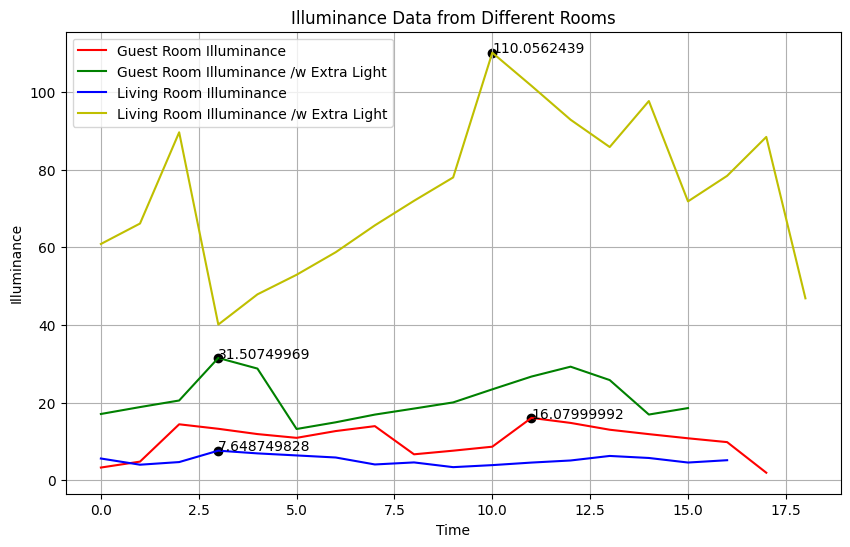

In [40]:
#Plot the data
#Define the size of the figure
plt.figure(figsize=(10, 6))

# Define the data points, label them, and color them to differ from each other
plt.plot(combined_df['Guest Room']['Illuminance (lx)'], label='Guest Room Illuminance', color='r')
plt.plot(combined_df['Guest Room /w Extra Light']['Illuminance (lx)'], label='Guest Room Illuminance /w Extra Light', color='g')
plt.plot(combined_df['Living Room']['Illuminance (lx)'], label='Living Room Illuminance', color='b')
plt.plot(combined_df['Living Room /w Extra Light']['Illuminance (lx)'], label='Living Room Illuminance /w Extra Light', color='y')

# Mark the maximum values
max_guest_room = combined_df['Guest Room']['Illuminance (lx)'].idxmax()
max_guest_room_value = combined_df['Guest Room']['Illuminance (lx)'].max()
plt.scatter(max_guest_room, max_guest_room_value, color='k', marker='o')
plt.text(max_guest_room, max_guest_room_value, f'{max_guest_room_value}', color='k')

max_guest_room_extra = combined_df['Guest Room /w Extra Light']['Illuminance (lx)'].idxmax()
max_guest_room_extra_value = combined_df['Guest Room /w Extra Light']['Illuminance (lx)'].max()
plt.scatter(max_guest_room_extra, max_guest_room_extra_value, color='k', marker='o')
plt.text(max_guest_room_extra, max_guest_room_extra_value, f'{max_guest_room_extra_value}', color='k')

max_living_room = combined_df['Living Room']['Illuminance (lx)'].idxmax()
max_living_room_value = combined_df['Living Room']['Illuminance (lx)'].max()
plt.scatter(max_living_room, max_living_room_value, color='k', marker='o')
plt.text(max_living_room, max_living_room_value, f'{max_living_room_value}', color='k')

max_living_room_extra = combined_df['Living Room /w Extra Light']['Illuminance (lx)'].idxmax()
max_living_room_extra_value = combined_df['Living Room /w Extra Light']['Illuminance (lx)'].max()
plt.scatter(max_living_room_extra, max_living_room_extra_value, color='k', marker='o')
plt.text(max_living_room_extra, max_living_room_extra_value, f'{max_living_room_extra_value}', color='k')

# Define everything else in the figure: axis labels, title, legend, and grid
plt.xlabel('Time')
plt.ylabel('Illuminance')
plt.title('Illuminance Data from Different Rooms')
plt.legend()
plt.grid(True)

#Show it to the people
plt.show()

I think that the sensor data was measured a bit wrong, or else I really do sit in a dark cave. The light levels seem to be really low. The best light levels were in the living room with the reading lamp on, but still the lux seem to be only 110 (lx). The lamp is perfectly adequate.

I think the reason for this is as Phyphox states: On some devices the light sensor is only updated when there is a coarse change of illuminance. So even the data only came through when I changed the alignment of the phone. 

This next part is a script to export this notebook into HTML, inject some codeblock styling into the HTML and then converting the html to pdf. This is because for some stupid reason the pdf conversion doesn't work for me even though I painstakingly installed TeX Live.

So now we have this monstrosity.

In [3]:
!jupyter nbconvert --to html light.ipynb

# Add custom CSS to the HTML file
html_file = 'light.html'
with open(html_file, 'r', encoding='utf-8') as file:
    html_content = file.read()

custom_css = """
<style>
pre {
    background-color: #f5f5f5;
    border: 1px solid #ccc;
    padding: 10px;
    border-radius: 5px;
    overflow: auto;
}
code {
    background-color: #f5f5f5;
    border: 1px solid #ccc;
    padding: 2px 4px;
    border-radius: 3px;
}
</style>
"""

# Insert the custom CSS into the <head> section of the HTML file
html_content = html_content.replace('<head>', '<head>' + custom_css)

# Write the modified HTML content back to the file
with open(html_file, 'w', encoding='utf-8') as file:
    file.write(html_content)

# Convert HTML to PDF using wkhtmltopdf with --enable-local-file-access
!wkhtmltopdf --enable-local-file-access light.html light.pdf

[NbConvertApp] Converting notebook light.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 395649 bytes to light.html
Loading pages (1/6)
[>                                                           ] 0%
[======>                                                     ] 10%
[============================>                               ] 47%
[============================>                               ] 47%
[==============================>                             ] 50%
[======================================================>     ] 90%
[======================================================>     ] 90%
[============================================================] 100%
Counting pages (2/6)                                               
[============================================================] Object 1 of 1
Resolving links (4/6)                                                       
[================================================